## Question 2

### Unzip Dataset

In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/Beagle/Beagle_27.jpg  
  inflating: dataset/Beagle/Beagle_28.jpg  
  inflating

### Import Libraries

In [ ]:
import os
import PIL
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

### Load Class Names

In [2]:
class_names = sorted(os.listdir('dataset'))
class_ids = {label: i for i, label in enumerate(class_names)}
class_ids

{'Beagle': 0,
 'Boxer': 1,
 'Bulldog': 2,
 'Dachshund': 3,
 'German_Shepherd': 4,
 'Golden_Retriever': 5,
 'Labrador_Retriever': 6,
 'Poodle': 7,
 'Rottweiler': 8,
 'Yorkshire_Terrier': 9}

### Print Image

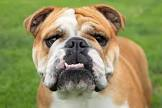

In [3]:
image_filepath = 'dataset/Bulldog/Bulldog_10.jpg'
image = PIL.Image.open(image_filepath)
image

## Question 3

### Load Images to Arrays

In [4]:
image_size = (64, 64)

inputs = []
targets = []
for label in class_names:
    for filename in os.listdir(f'dataset/{label}'):
        filepath = f'dataset/{label}/{filename}'
        img = PIL.Image.open(filepath).convert('RGB').resize(image_size)
        inputs.append(img)
        targets.append(class_ids[label])
inputs = np.float32(inputs)
targets = np.int32(targets)

inputs.shape, targets.shape

((967, 64, 64, 3), (967,))

### Plot Distribution

<BarContainer object of 10 artists>

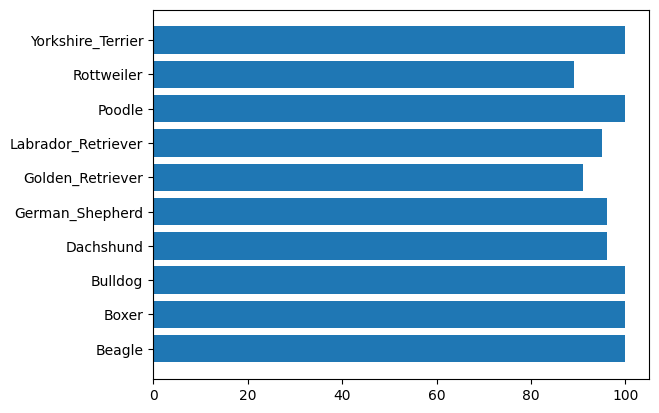

In [5]:
target_counts = np.unique(targets, return_counts=True)
plt.barh(class_names, target_counts[1])

### Splitting inputs to Train/Test

In [8]:
seed = 32
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    targets,
    test_size=0.3,
    stratify=targets,
    random_state=seed
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((676, 64, 64, 3), (676,), (291, 64, 64, 3), (291,))

In [15]:
y_train = np.eye(len(class_names))[y_train]
y_test = np.eye(len(class_names))[y_test]

y_train.shape, y_test.shape

((676, 10), (291, 10))

## Question 4

#### Building Multi-Layer Perceptron (MLP)



*   Input layer: 64x64x3 = 12288 units
*   Output layer: 10 nodes



In [16]:
input_size = x_train.shape[1:]
output_size = len(class_names)

mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='MLP')
mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,590,794 (6.07 MB)

 Trainable params: 1,590,794 (6.07 MB)

 Non-trainable params: 0 (0.00 B)

Το MLP μας αποτελείται από 1 Input και 1 output layer και από 2 hidden layers.

Το input layer αποτελείται από 12288 units, όσο είναι και ο αριθμός των features κάθε εικόνας (64x64x3).

Tα 2 hidden Dense layers αποτελούνται από 128 νευρώνες το κάθε ένα, με συνάρτηση ενεργοποίησης 'Relu'.
- Dense layer θεωρείται ένα layer που ο κάθε ένας νευρώνας είναι συνδεμένος με όλους τους νευρώνες του προηγούμενου layer και συνεπώς παίρνει είσοδο από όλους.
- Η ReLU (Rectified Linear Unit) είναι συνάρτηση ενεργοποίησης που χρησιμοποιείται για να εισαχθεί στον MLP η μη-γραμμικότητα. Δηλαδή να προσπαθήσει να χωρίσει τις κλάσεις με μη-γραμμικό τρόπο και όχι με ευθεία.

Το output layer αποτελείται από 10 νευρώνες, όσο είναι και ο αριθμός των κλάσεων.

Τέλος, βλέπουμε ότι το MLP μας έχει σύνολο 1,590,794 παραμέτρους που όλες είναι trainable, δηλαδή αλλάζουν τα βάρη τους κατά την εκπαίδευση.

## Question 5

### Training MLP

* Optimizer: Adam
* Learning Rate: 0.001
* Loss Function: Categorical Cross-Entropy
* Batch Size: 32
* Epochs: 30

In [17]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
mlp.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
batch_size = 32
epochs = 30

history = mlp.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1346 - loss: 1070.1847 - val_accuracy: 0.1271 - val_loss: 405.5411
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2278 - loss: 224.8412 - val_accuracy: 0.2234 - val_loss: 95.1741
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3166 - loss: 76.7386 - val_accuracy: 0.3746 - val_loss: 57.3223
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4408 - loss: 42.5563 - val_accuracy: 0.3368 - val_loss: 53.5169
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4630 - loss: 46.9613 - val_accuracy: 0.3162 - val_loss: 90.7113
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4408 - loss: 55.9878 - val_accuracy: 0.2784 - val_loss: 109.7093
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4615 - loss: 59.8310 - val_accuracy: 0.3299 - val_loss: 95.3437
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5340 - loss: 30.9230 - val_accurac

## Question 6

### Plot Loss History per Epoch

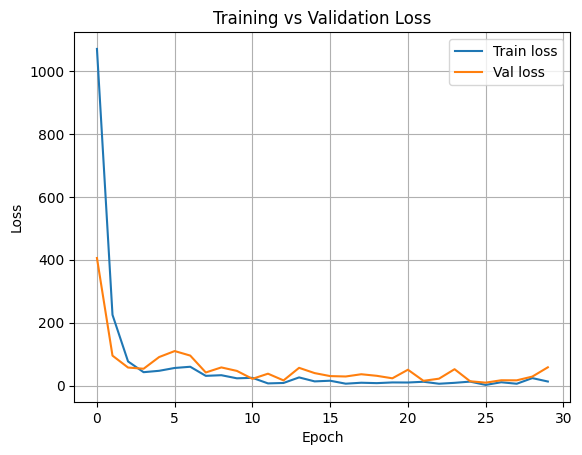

In [19]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

### Plot Accuracy History per Epoch

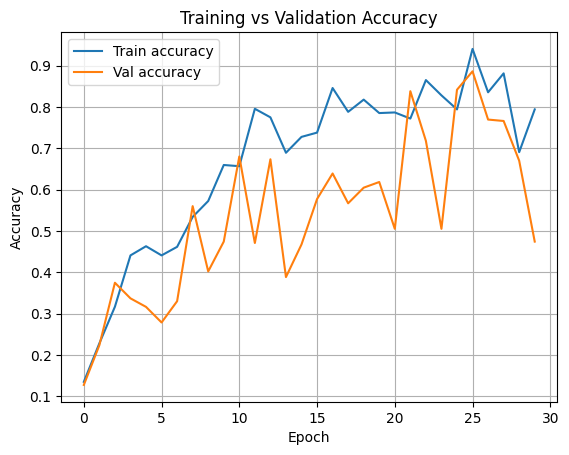

In [20]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Question 7

### Building Convolutional Neural Network (CNN)

In [21]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='CNN')
cnn.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,298 (13.18 MB)

 Trainable params: 3,456,298 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

Κάθε Convolutional επίπεδο στο Neural Network που φτιάξαμε αποτελείται από:

- Filters: Ο αριθμός των φίλτρων που χρησιμοποιεί το επίπεδο, στη περίπτωσή μας 32.
- Kernel Size: Για το μέγεθος του kernel χρησιμοποιήσαμε 3, που σημαίνει ότι το κάθε φίλτρο θα έχει διαστάσεις 3x3.
- Stride: Είναι το βήμα του φίλτρου, δηλαδή πόσα pixel δεξιά πάει μετά από κάθε εφαρμογή του.
- Activation function: Χρησιμοποιούμε την ReLU όπως και στο MLP.

Επίσης έχουμε θέσει και το bias=True, για να προσθέτει ένα μικρό αριθμό bias στην έξοδο κάθε layer.

Τέλος, στο τελευταίο output layer έχουμε χρησιμοποιήσει ως activation function την softmax για να μας δώσει το αποτέλεσμα της κλάσης με πιθανότητες που αθροίζουν στο 1.

### Training CNN

* Optimizer: Adam
* Learning Rate: 0.001
* Loss Function: Categorical Cross-Entropy
* Batch Size: 32
* Epochs: 30

In [22]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
batch_size = 32
epochs = 30

history = cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1391 - loss: 103.6454 - val_accuracy: 0.4261 - val_loss: 1.9376
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5666 - loss: 1.3793 - val_accuracy: 0.8694 - val_loss: 0.7539
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8964 - loss: 0.3462 - val_accuracy: 0.9656 - val_loss: 0.2617
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9630 - loss: 0.1084 - val_accuracy: 0.9725 - val_loss: 0.1067
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9808 - loss: 0.0637 - val_accuracy: 0.9691 - val_loss: 0.1501
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9867 - loss: 0.0349 - val_accuracy: 0.9725 - val_loss: 0.1492
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9970 - loss: 0.0103 - val_accuracy: 0.9656 - val_loss: 0.1685
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9985 - loss: 0.0035 - val_accuracy: 0.9691 -

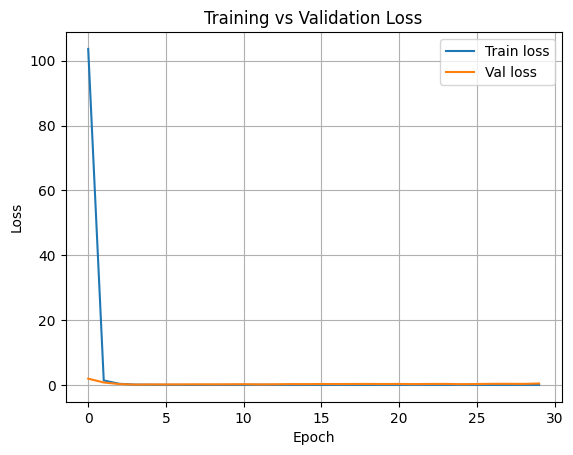

In [24]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

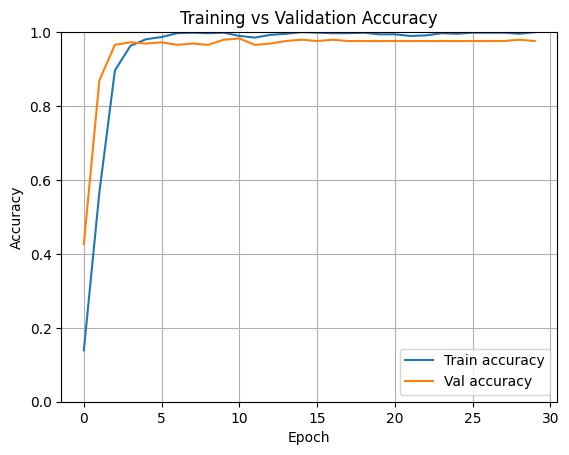

In [25]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.ylim(0,1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Παρατηρούμε ότι το Convolutional Neural Network τα πήγε πολύ καλύτερα από τον Multi-Layer Perceptron. Αυτό συμβαίνει διότι, τα CNNs χρησιμοποιόντας τα φίλτρα πάνω στις εικόνες, μπορούν να καταλάβουν μοτίβα κοντινών pixel πιο εύκολα απότι ένα MLP, που απλά δέχεται όλο το διάνυσμα της εικόνας σαν είσοδο και χειρίζεται κάθε pixel ανεξάρτητα.

## Question 8

### Fine-tuning CNN

Για αρχή κανονικοποίησα τα δεδομένα στο διάστημα [-1,1]. 

Στη συνέχεια, δοκίμασα να μειώσω και να αυξήσω τον ρυθμό μάθησης του CNN αλλά δεν βελτιώθηκε η απόδοση οπότε το άφησα στο 0.001, καθώς επίσης να αλλάξω τον αριθμό των φίλτρων αλλά χωρίς καλύτερα αποτελέσματα.

Επίσης, άλλαξα το βήμα ολίσθησης (stride) στο δεύτερο convolutional layers από 1 σε 2.

Τέλος, πρόσθεσα και BatchNormalization στα 2 convolutional layers.

##### Normalize Data to [-1,1]

In [26]:
x_train_norm = 2*(x_train/255)-1
x_test_norm = 2*(x_test/255)-1

In [45]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='CNN')
cnn.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 933,418 (3.56 MB)

 Trainable params: 933,290 (3.56 MB)

 Non-trainable params: 128 (512.00 B)

In [46]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
history = cnn.fit(
    x_train_norm,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test_norm, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6627 - loss: 1.2997 - val_accuracy: 0.7457 - val_loss: 1.9333
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9956 - loss: 0.0288 - val_accuracy: 0.6976 - val_loss: 1.7224
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.7251 - val_loss: 1.6006
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.7079 - val_loss: 1.5111
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 9.4577e-04 - val_accuracy: 0.6976 - val_loss: 1.4190
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 6.4329e-04 - val_accuracy: 0.7320 - val_loss: 1.3188
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 6.0214e-04 - val_accuracy: 0.7560 - val_loss: 1.2019
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 4.7442e-04 - val_accu

Μπορεί η ακρίβεια να αυξήθηκες ελάχιστα από 97.59 σε 97.94, αλλά το loss από 0.4434 έπεσε στο 0.0837 (μείωση κατά 81.12%).

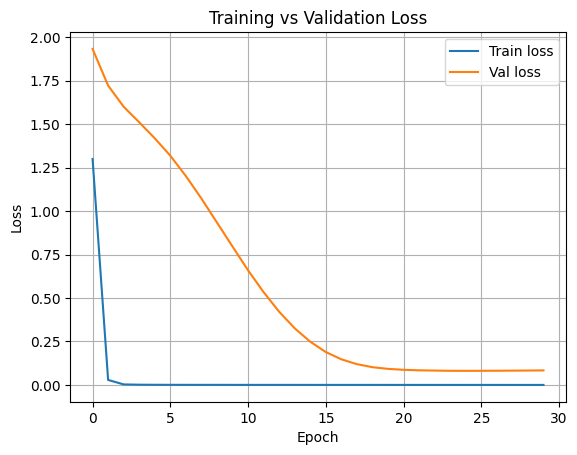

In [50]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

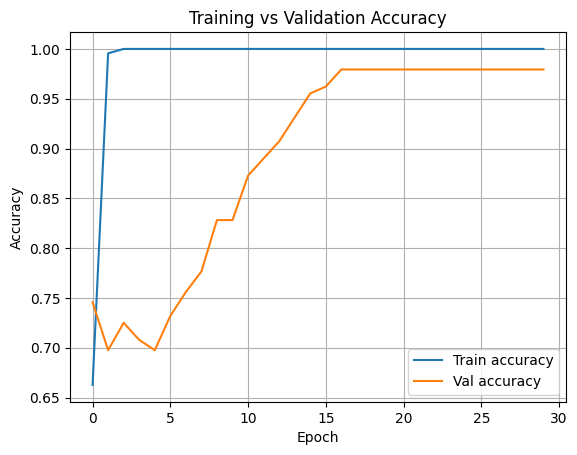

In [51]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()